<a href="https://colab.research.google.com/github/Chulinuwu/GithubDemo/blob/My-Code/ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

Line Equation (y = wx + b)

In [ ]:
xp = np.array(range(20))
w = 0
b = 4
yp = w*xp + b

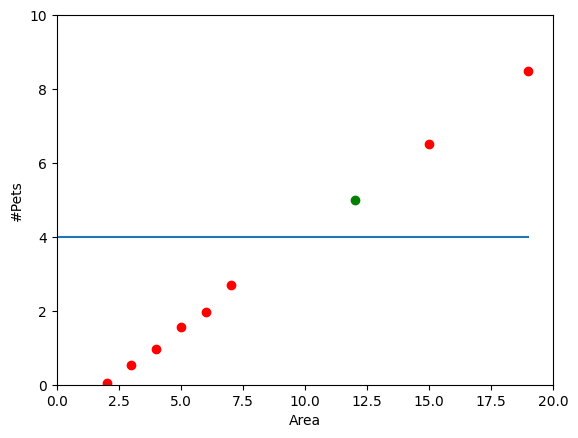

In [ ]:
np.random.seed(0)
x = np.array(range(8))
y = 0.5 * x - 1 + (np.random.rand(8) - 0.5)*0.5
x = np.append(x, [15, 19])
y = np.append(y, 0.5 * np.array([15, 19]) - 1)
plt.scatter(x, y, c="red")
ax = plt.gca()
ax.set_xlim([0, 20])
ax.set_ylim([0, 10])
plt.xlabel("Area")
plt.ylabel("#Pets")
plt.plot(xp, yp)
plt.scatter([12],[0.5*12-1], c="green")

Try to fit blue line to red dots.

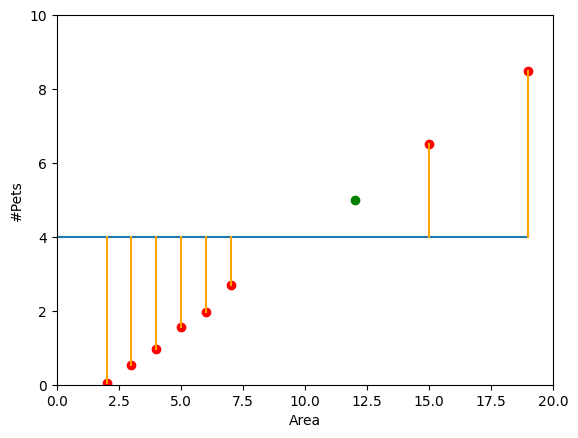

In [ ]:
np.random.seed(0)
x = np.array(range(8))
y = 0.5 * x - 1 + (np.random.rand(8) - 0.5)*0.5
x = np.append(x, [15, 19])
y = np.append(y, 0.5 * np.array([15, 19]) - 1)
plt.scatter(x, y, c="red")
ax = plt.gca()
ax.set_xlim([0, 20])
ax.set_ylim([0, 10])
plt.xlabel("Area")
plt.ylabel("#Pets")
plt.plot(xp, yp)
plt.scatter([12],[0.5*12-1], c="green")
for i in [2,3,4,5,6,7,8,9]:
  plt.plot([x[i], x[i]],[y[i], yp[i]], c="orange")

In [ ]:
yp_clip = np.ones(8) * 4
yp_clip

array([4., 4., 4., 4., 4., 4., 4., 4.])

In [ ]:
y_clip = y[2:]
x_clip = np.array([2,3,4,5,6,7,15,19])

In [ ]:
def dw(yp, y, x):
  return np.sum((yp - y) * x)*2/len(y)
def db(yp,y):
  return np.sum(yp-y)*2/len(y)

In [ ]:
x_clip

array([ 2,  3,  4,  5,  6,  7, 15, 19])

In [ ]:
y_clip

array([0.05138169, 0.52244159, 0.9618274 , 1.57294706, 1.96879361,
       2.6958865 , 6.5       , 8.5       ])

In [ ]:
w = 0         #Initial Value
b = 4         #Initial Value
a = 0.001     #Learning Rate
steps = 10000
for i in range(steps):
  yp = w * x_clip + b
  w = w - a*dw(yp, y_clip, x_clip)
  b = b - a*db(yp, y_clip)
(w,b)

(0.4976697466407547, -0.9466463864659121)

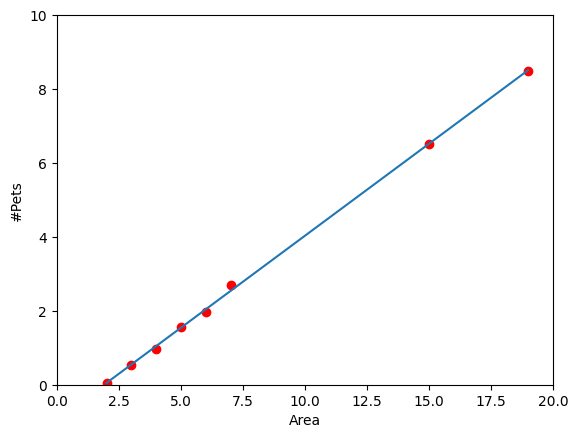

In [ ]:
plt.scatter(x_clip, y_clip, c="red")
ax = plt.gca()
ax.set_xlim([0, 20])
ax.set_ylim([0, 10])
plt.xlabel("Area")
plt.ylabel("#Pets")
plt.plot(x_clip, w*x_clip+b)

# Logistic Regression

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
def sigmoid(z):
  return 1.0 / (1.0 + np.exp(-z))
def linear(x, w, b):
  return np.transpose(w)*x + b

In [ ]:
np.random.seed(0)
x = np.array([100, 110, 120, 120, 120, 130, 140, 140, 150, 150, 160, 170, 180])
print(f"x: {x}")
y = np.array([0,0,0,1,1,0,0,1,1,1,1,1,1])
print(f"y: {y}")
w = np.random.rand(1)
print(f"w: {w}")
b = np.random.rand(1)
print(f"b: {b}")
lin = linear(x, w, b)
print(f"linear: {lin}")

x: [100 110 120 120 120 130 140 140 150 150 160 170 180]
y: [0 0 0 1 1 0 0 1 1 1 1 1 1]
w: [0.5488135]
b: [0.71518937]
linear: [55.59653976 61.0846748  66.57280984 66.57280984 66.57280984 72.06094488
 77.54907992 77.54907992 83.03721496 83.03721496 88.52534999 94.01348503
 99.50162007]


Text(0, 0.5, 'P(Good_Price)')

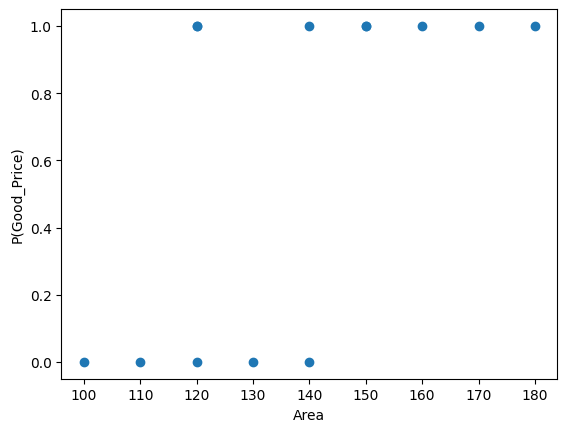

In [ ]:
plt.scatter(x,y)
plt.xlabel("Area")
plt.ylabel("P(Good_Price)")


Text(0, 0.5, 'P(Good_Price)')

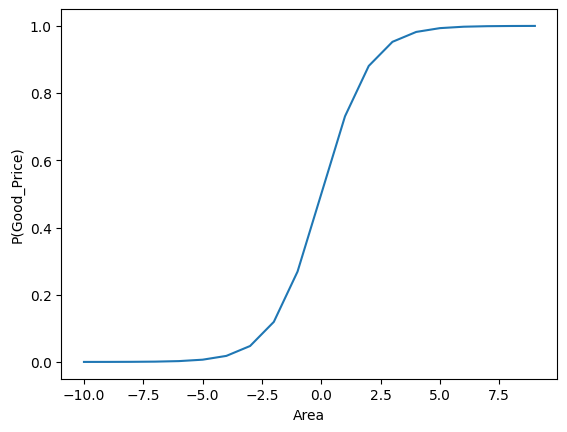

In [ ]:
z = np.array(range(-10, 10))
plt.plot(range(-10,10), sigmoid(z))
plt.xlabel("Area")
plt.ylabel("P(Good_Price)")


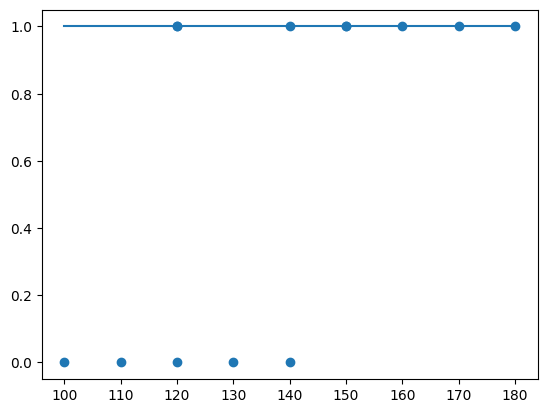

In [ ]:
z = linear(x, w, b)
yp = sigmoid(z)
plt.scatter(x,y)
plt.plot(x, yp)

In [ ]:
def sigmoid_loss(yp, y):
  return y*np.log(yp) + (1-y)*np.log(1 - yp)

def sigmoid_cost(yp, y):
  return -np.sum(sigmoid_loss(yp, y)) / len(y)

In [ ]:
def dw_and_db(y, x, w, b):
  z = w * x + b
  a = sigmoid(z)
  db = a - y
  dw = x * db
  return (np.average(dw), np.average(db))

In [ ]:
steps = 230000
learning_rate = 0.01
w = np.random.rand(1)
b = np.random.rand(1)


for i in range(steps):
  (dw, db) = dw_and_db(y, x, w, b)
  w = w - learning_rate * dw
  b = b - learning_rate * db

print(w)
print(b)

[0.79770207]
[-103.33662265]


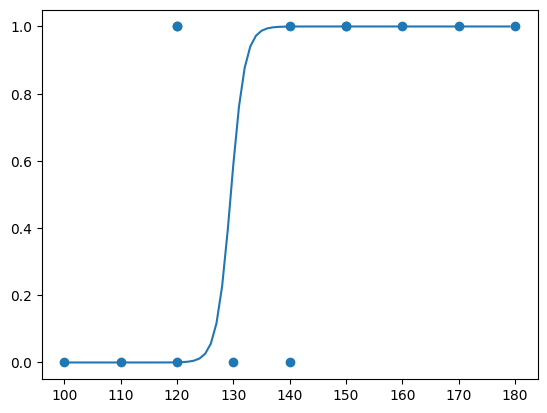

In [ ]:
tx = range(100, 180)
z = linear(tx, w, b)
yp = sigmoid(z)
plt.scatter(x,y)
plt.plot(tx, yp)

In [ ]:
yp

array([3.26531935e-10, 6.81838713e-10, 1.42376282e-09, 2.97299132e-09,
       6.20797033e-09, 1.29630030e-08, 2.70683392e-08, 5.65220090e-08,
       1.18024877e-07, 2.46450381e-07, 5.14618472e-07, 1.07458586e-06,
       2.24386439e-06, 4.68545249e-06, 9.78374934e-06, 2.04294506e-05,
       4.26582491e-05, 8.90715195e-05, 1.85974228e-04, 3.88258418e-04,
       8.10388810e-04, 1.69070032e-03, 3.52390665e-03, 7.33024172e-03,
       1.51853222e-02, 3.11933906e-02, 6.29973530e-02, 1.23107331e-01,
       2.26695948e-01, 3.79705774e-01, 5.61060742e-01, 7.27452049e-01,
       8.47870903e-01, 9.20872731e-01, 9.60476332e-01, 9.80674119e-01,
       9.90650699e-01, 9.95500708e-01, 9.97840229e-01, 9.98964522e-01,
       9.99503843e-01, 9.99762329e-01, 9.99886166e-01, 9.99945482e-01,
       9.99973890e-01, 9.99987496e-01, 9.99994012e-01, 9.99997132e-01,
       9.99998627e-01, 9.99999342e-01, 9.99999685e-01, 9.99999849e-01,
       9.99999928e-01, 9.99999965e-01, 9.99999983e-01, 9.99999992e-01,
      

# Tokenizer

In [ ]:
from transformers import BertTokenizer, LlamaTokenizer
bert_tokenizer = BertTokenizer.from_pretrained("bert-base-cased")
bert_ml_tokenizer = BertTokenizer.from_pretrained("bert-base-multilingual-cased")
llama_tokenizer = LlamaTokenizer.from_pretrained("hf-internal-testing/llama-tokenizer")

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

In [ ]:
bert_tokenizer.tokenize("The black cat runs after the white supermouse.")

['The',
 'black',
 'cat',
 'runs',
 'after',
 'the',
 'white',
 'super',
 '##mous',
 '##e',
 '.']

In [ ]:
llama_tokenizer.tokenize("The black cat runs after the white supermouse.")

['▁The',
 '▁black',
 '▁cat',
 '▁runs',
 '▁after',
 '▁the',
 '▁white',
 '▁super',
 'mouse',
 '.']

In [ ]:
llama_tokenizer.tokenize("แมวดำตัวหนึ่งวิ่งไล่ซุปเปอร์หนูสีขาว")

['▁',
 'แ',
 'ม',
 'ว',
 'ด',
 'ำ',
 'ต',
 'ั',
 'ว',
 'ห',
 'น',
 '<0xE0>',
 '<0xB8>',
 '<0xB6>',
 '่',
 'ง',
 'ว',
 'ิ',
 '่',
 'ง',
 'ไ',
 'ล',
 '่',
 '<0xE0>',
 '<0xB8>',
 '<0x8B>',
 'ุ',
 'ป',
 'เ',
 'ป',
 'อ',
 'ร',
 '์',
 'ห',
 'น',
 'ู',
 'ส',
 'ี',
 'ข',
 'า',
 'ว']

In [ ]:
bert_tokenizer.tokenize("แมวดำตัวหนึ่งวิ่งไล่ซุปเปอร์หนูสีขาว")

['[UNK]']

In [ ]:
bert_ml_tokenizer.tokenize("แมวดำตัวหนึ่งวิ่งไล่ซุปเปอร์หนูสีขาว")

['แ',
 '##ม',
 '##ว',
 '##ด',
 '##ำ',
 '##ต',
 '##ัว',
 '##ห',
 '##น',
 '##ึ',
 '##่ง',
 '##ว',
 '##ิ',
 '##่ง',
 '##ไ',
 '##ล',
 '##่',
 '##ซ',
 '##ุ',
 '##ป',
 '##เ',
 '##ป',
 '##อร์',
 '##ห',
 '##น',
 '##ู',
 '##ส',
 '##ี',
 '##ข',
 '##าว']

In [ ]:
from transformers import AutoTokenizer

model_id = "scb10x/typhoon-v1.5-72b-instruct"

tokenizer = AutoTokenizer.from_pretrained(model_id)

tokenizer_config.json:   0%|          | 0.00/1.17k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/2.78M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/1.67M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/7.03M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/80.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/370 [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [ ]:
tokenizer.tokenize("ข")

['à¸Ĥ']

In [ ]:
tokenizer.decode(tokenizer.encode("นก"))

'นก'

In [ ]:
mpnet_tokenizer = AutoTokenizer.from_pretrained("sentence-transformers/paraphrase-multilingual-mpnet-base-v2")

tokenizer_config.json:   0%|          | 0.00/402 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/723 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.08M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

In [ ]:
mpnet_tokenizer.tokenize("แมวดำตัวหนึ่งวิ่งไล่ซุปเปอร์หนูสีขาว")

['▁',
 'แมว',
 'ดํา',
 'ตัว',
 'หนึ่ง',
 'วิ่ง',
 'ไล่',
 'ซุ',
 'ป',
 'เปอร์',
 'หนู',
 'สีขาว']

# Embedding

In [ ]:
!pip install fasttext

In [ ]:
import fasttext
import numpy as np
from huggingface_hub import hf_hub_download

model_path = hf_hub_download(repo_id="facebook/fasttext-en-vectors", filename="model.bin")
model = fasttext.load_model(model_path)
model.words

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


[',',
 'the',
 '.',
 'and',
 'to',
 'of',
 'a',
 '</s>',
 'in',
 'is',
 ':',
 'I',
 'for',
 'that',
 ')',
 '"',
 '(',
 'on',
 'with',
 'it',
 'you',
 'The',
 'was',
 'as',
 'are',
 'at',
 '/',
 '’',
 'be',
 'by',
 "'s",
 'this',
 'have',
 'from',
 'or',
 '!',
 'not',
 'your',
 'an',
 "'",
 'but',
 '?',
 'can',
 '-',
 'will',
 's',
 'my',
 'has',
 'all',
 'we',
 'they',
 'he',
 'his',
 'more',
 'one',
 'about',
 'their',
 "'t",
 'so',
 'which',
 'It',
 'out',
 'up',
 '...',
 'were',
 'had',
 'who',
 'like',
 ';',
 '“',
 'our',
 'would',
 '”',
 'time',
 'been',
 'if',
 'also',
 'just',
 'when',
 'her',
 'This',
 'me',
 'there',
 'do',
 'what',
 'some',
 'other',
 'In',
 'them',
 '–',
 '1',
 'get',
 'new',
 'into',
 '&',
 'We',
 'than',
 'A',
 'no',
 'only',
 'first',
 'any',
 'its',
 'people',
 '2',
 '$',
 'very',
 't',
 'over',
 'she',
 '%',
 'how',
 'make',
 'You',
 'said',
 'He',
 'two',
 'may',
 'know',
 'then',
 'see',
 'after',
 'most',
 'good',
 'years',
 'If',
 'these',
 'now',
 

In [ ]:
model['bread']

array([ 1.66560188e-02,  4.83326837e-02, -4.07977439e-02,  7.29793161e-02,
       -9.07280296e-03,  1.27149627e-01,  1.31222531e-01,  3.06046270e-02,
       -3.34123448e-02,  8.24084282e-02, -6.39760047e-02,  1.12891551e-02,
        9.14333984e-02,  2.33892687e-02,  5.14939502e-02,  1.04815707e-01,
        1.08066220e-02,  1.06133692e-01,  3.46985906e-02, -4.42300104e-02,
       -4.35786769e-02,  9.25996751e-02, -9.69411805e-02, -1.44355586e-02,
        1.21351797e-02, -1.10497966e-01,  1.03149407e-01, -9.01999250e-02,
        1.23140305e-01,  1.64086506e-01,  3.23432237e-02,  2.00566024e-01,
        1.51708782e-01,  2.42252685e-02, -6.99371025e-02,  9.23830718e-02,
       -2.70268824e-02,  8.17851350e-02, -1.53318346e-01, -1.55680507e-01,
       -3.22322324e-02,  6.29726425e-02,  8.55547488e-02,  4.02307510e-02,
       -1.69549733e-01,  3.27703357e-02, -4.56138700e-02,  9.41093266e-03,
        4.92844284e-02,  1.47414515e-02, -2.30129287e-02, -2.45344378e-02,
       -4.94667254e-02, -

In [ ]:
model.get_nearest_neighbors("bread", k=5)

[(0.7803311944007874, 'loaf'),
 (0.7558791637420654, 'bread-'),
 (0.7321020364761353, 'breads'),
 (0.7222297787666321, 'bread.But'),
 (0.721259355545044, 'bread.The')]

In [ ]:
model.get_analogies("berlin", "germany", "thailand", k=10)

[(0.7068533301353455, 'bangkok'),
 (0.683131217956543, 'phuket'),
 (0.6446604132652283, 'pattaya'),
 (0.624406635761261, 'bkk'),
 (0.617925763130188, 'thailand.'),
 (0.6104963421821594, 'Bangkok.'),
 (0.5995888710021973, 'bangkok.'),
 (0.5994430780410767, 'Thailand.'),
 (0.5969651937484741, 'bali'),
 (0.5942238569259644, 'Bangkok')]

# Generative AI


In [ ]:
!pip install -q  torch peft==0.4.0 bitsandbytes==0.40.2 transformers==4.31.0 trl==0.4.7 accelerate

import torch
from datasets import load_dataset
from transformers import (
    AutoModelForCausalLM,
    AutoTokenizer,
    BitsAndBytesConfig,
    TrainingArguments,
    pipeline
)
from peft import LoraConfig
from trl import SFTTrainer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.9/72.9 kB 589.7 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.5/92.5 MB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 20.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.4/77.4 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 314.1/314.1 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 41.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 38.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 67.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 26.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
# Dataset
data_name = "mlabonne/guanaco-llama2-1k"
training_data = load_dataset(data_name, split="train")

# Model and tokenizer names
base_model_name = "NousResearch/Llama-2-7b-chat-hf"
refined_model = "llama2-thai" #You can give it your own name

# Tokenizer
llama_tokenizer = AutoTokenizer.from_pretrained(base_model_name, trust_remote_code=True)
llama_tokenizer.pad_token = llama_tokenizer.eos_token
llama_tokenizer.padding_side = "right"  # Fix for fp16

# Quantization Config
quant_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_quant_type="nf4",
    bnb_4bit_use_double_quant=False
)

# Model
base_model = AutoModelForCausalLM.from_pretrained(
    base_model_name,
    quantization_config=quant_config,
    device_map={"": 0}
)
base_model.config.use_cache = False
base_model.config.pretraining_tp = 1

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/1000 [00:00<?, ? examples/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/746 [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/21.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/435 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/583 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


model.safetensors.index.json:   0%|          | 0.00/26.8k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/9.98G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/3.50G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/200 [00:00<?, ?B/s]

In [ ]:
# LoRA Config
peft_parameters = LoraConfig(
    lora_alpha=16,
    lora_dropout=0.1,
    r=8,
    bias="none",
    task_type="CAUSAL_LM"
)

# Training Params
train_params = TrainingArguments(
    output_dir="./results_modified",
    num_train_epochs=1,
    per_device_train_batch_size=4,
    gradient_accumulation_steps=1,
    optim="paged_adamw_32bit",
    save_steps=25,
    logging_steps=25,
    learning_rate=2e-4,
    weight_decay=0.001,
    fp16=False,
    bf16=False,
    max_grad_norm=0.3,
    max_steps=-1,
    warmup_ratio=0.03,
    group_by_length=True,
    lr_scheduler_type="constant",
    report_to="tensorboard"
)

# Trainer
fine_tuning = SFTTrainer(
    model=base_model,
    train_dataset=training_data,
    peft_config=peft_parameters,
    dataset_text_field="text",
    tokenizer=llama_tokenizer,
    args=train_params
)

# Training
fine_tuning.train()

# Save Model
fine_tuning.model.save_pretrained('llama2-thai')

/usr/local/lib/python3.10/dist-packages/peft/utils/other.py:102: FutureWarning: prepare_model_for_int8_training is deprecated and will be removed in a future version. Use prepare_model_for_kbit_training instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/trl/trainer/sft_trainer.py:159: UserWarning: You didn't pass a `max_seq_length` argument to the SFTTrainer, this will default to 1024
  warnings.warn(


Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

You're using a LlamaTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.
/usr/local/lib/python3.10/dist-packages/torch/utils/checkpoint.py:464: UserWarning: torch.utils.checkpoint: the use_reentrant parameter should be passed explicitly. In version 2.4 we will raise an exception if use_reentrant is not passed. use_reentrant=False is recommended, but if you need to preserve the current default behavior, you can pass use_reentrant=True. Refer to docs for more details on the differences between the two variants.
  warnings.warn(


Step,Training Loss


KeyboardInterrupt: 

In [ ]:
# Generate Text
query = "Please tell a story about little red riding hood."
text_gen = pipeline(task="text-generation", model=base_model, tokenizer=llama_tokenizer, max_length=200)
output = text_gen(f"<s>[SYS]You are a bed time story teller. Tell the story in most fastinating ways.[/SYS][INST] {query} [/INST]")
print(output[0]['generated_text'])

Xformers is not installed correctly. If you want to use memory_efficient_attention to accelerate training use the following command to install Xformers
pip install xformers.
/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1270: UserWarning: You have modified the pretrained model configuration to control generation. This is a deprecated strategy to control generation and will be removed soon, in a future version. Please use a generation configuration file (see https://huggingface.co/docs/transformers/main_classes/text_generation )
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torch/utils/checkpoint.py:91: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn(


<s>[SYS]You are a bed time story teller. Tell the story in most fastinating ways.[/SYS][INST] Please tell a story about little red riding hood. [/INST]  Oh, my dear listener, gather 'round and get comfortable, for I have a tale to tell that will take you on a thrilling adventure! 🧚‍♀️🧝‍♂️

Once upon a time, in a land far, far away, there was a little girl named Little Red Riding Hood. She lived in a cozy little cottage at the edge of a lush, green forest, surrounded by her loving family and a menagerie of furry friends. 🐰🐶

Every day, Little Red Riding Hood would don her signature red hooded cloak and set off on her journey to visit her sick grandm


In [ ]:
output

[{'generated_text': "<s>[SYS]You are a bed time story teller. Tell the story in most fastinating ways.[/SYS][INST] Please tell a story about little red riding hood. [/INST]  Oh, my dear listener, gather 'round and get comfortable, for I have a tale to tell that will take you on a thrilling adventure! 🧚\u200d♀️🧝\u200d♂️\n\nOnce upon a time, in a land far, far away, there was a little girl named Little Red Riding Hood. She lived in a cozy little cottage at the edge of a lush, green forest, surrounded by her loving family and a menagerie of furry friends. 🐰🐶\n\nEvery day, Little Red Riding Hood would don her signature red hooded cloak and set off on her journey to visit her sick grandm"}]